# Когортный анализ <b> клиент - "Интернет-магазин" </b>.

Анализ <u> бизнес-результатов </u> и сегментация потребителей

Бизнес - цель определить когорту с максимальным возвратом на третий месяц

In [1]:
#импорт нужных библиотек с некоторым запасом, потому что мало ли что
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

In [2]:
# Откроем все файлы и начнем с ними разбираться
# Внезапно, никаких дополнительных параметров указывать не пришлось
customers_df = pd.read_csv(r"C:\Alex\Learnings\karpov\mid_project\olist_customers_dataset.csv")
items_df = pd.read_csv(r"C:\Alex\Learnings\karpov\mid_project\olist_order_items_dataset.csv"
                       ,parse_dates = ['shipping_limit_date'])
orders_df = pd.read_csv(r"C:\Alex\Learnings\karpov\mid_project\olist_orders_dataset.csv")

In [3]:
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


customers_df - колонки названы правильно, пропусков в данных нет,
преобразование типов пока не требуется, не думаю, что мне что-то придется делать с зип-кодом.
Решим позже, нужно ли что-то менять

In [5]:
customers_df.duplicated().sum()

0

In [6]:
items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [7]:
items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


И здесь тоже преобразований с названиями столбцов нет проблем, но стоит спарсить колонку с датой как дату или если не получится, то уже перевести в нужный формат более явным способом

In [8]:
items_df.duplicated().sum()

0

In [9]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [10]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


В последнем файле есть множество столбцов с датами, которые также было бы лучше сразу спарсить в нужный формат при чтении. Что я и постарался сделать, но увы. Будем переводить руками

In [11]:
columns_to_convert = orders_df.columns.to_list()

In [12]:
del columns_to_convert[:3]

In [13]:
columns_to_convert

['order_purchase_timestamp',
 'order_approved_at',
 'order_delivered_carrier_date',
 'order_delivered_customer_date',
 'order_estimated_delivery_date']

In [14]:
for col in columns_to_convert:
    orders_df[f'{col}'] = pd.to_datetime(orders_df[f'{col}'])

In [15]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [16]:
orders_df.duplicated().sum()

0

In [17]:
# Сначала соединим данные двух дата-фреймах, где есть данные об уникальных пользователях и их заказах
customers_orders = customers_df.copy(deep= True)

In [18]:
customers_orders = customers_orders.merge(orders_df, how = 'left', on = 'customer_id')

In [19]:
# Соберем дата-фрейм для когортного анализа, в котором уникальные пользователи соеденены с данными о покупках
customers_orders_items = customers_orders.copy()
customers_orders_items = customers_orders_items.merge(items_df, how = 'left', on = 'order_id')
cohorts_sales = customers_orders_items[['customer_unique_id', 'order_id', 'order_purchase_timestamp', 'price']]

In [20]:
# Для построения когорт в разбивек по месяцам приведем даты покупок к нужному периоду
cohorts_sales.order_purchase_timestamp =  cohorts_sales.order_purchase_timestamp.dt.to_period('M')

C:\Users\icom\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [21]:
# Добавим столбец с датой первого заказа
cohorts_sales.set_index('customer_unique_id', inplace = True)
cohorts_sales['cohort'] = cohorts_sales.groupby(level=0)['order_purchase_timestamp'].min()
cohorts_sales.reset_index(inplace = True)

<ipython-input-21-321f1758551c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohorts_sales['cohort'] = cohorts_sales.groupby(level=0)['order_purchase_timestamp'].min()


In [22]:
# Присвоим колонкам более подходящие имена. Вдруг Василию захочется эксельку или что-то в этом духе
cohorts_sales = cohorts_sales.rename(columns = {'order_purchase_timestamp':'order_month', 'price':'value'})

In [23]:
# Попытка посчитать продажи в тысячах для более удобной визаулизации на хитмапе. Не обязательно, да и не помогло особо
cohorts_sales.value = (cohorts_sales.value / 1000).round(2)

In [24]:
cohorts_sales.head()

,customer_unique_id,order_id,order_month,value,cohort
0,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,2017-05,0.12,2017-05
1,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,2018-01,0.29,2018-01
2,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05,0.14,2018-05
3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,2018-03,0.15,2018-03
4,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07,0.23,2018-07


In [25]:
cohorts_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113425 entries, 0 to 113424
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype    
---  ------              --------------   -----    
 0   customer_unique_id  113425 non-null  object   
 1   order_id            113425 non-null  object   
 2   order_month         113425 non-null  period[M]
 3   value               112650 non-null  float64  
 4   cohort              113425 non-null  period[M]
dtypes: float64(1), object(2), period[M](2)
memory usage: 4.3+ MB


In [26]:
# На всякий случай превратим названия когорт в строки, чтобы не путать с датами
cohorts_sales.cohort = cohorts_sales.cohort.astype(str)

In [27]:
# Теперь построим таблицу с продажами по когортам и визуализируем результат
cohorts = cohorts_sales.pivot_table(index = 'order_month', columns = 'cohort', values = 'value', aggfunc = 'sum')

In [28]:
cohorts.head()

cohort,2016-09,2016-10,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,...,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10
order_month,,,,,,,,,,,,,,,,,,,,,
2016-09,0.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,NaN,49.48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12,NaN,NaN,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,NaN,NaN,0.01,119.82,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-02,NaN,NaN,NaN,0.13,246.68,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


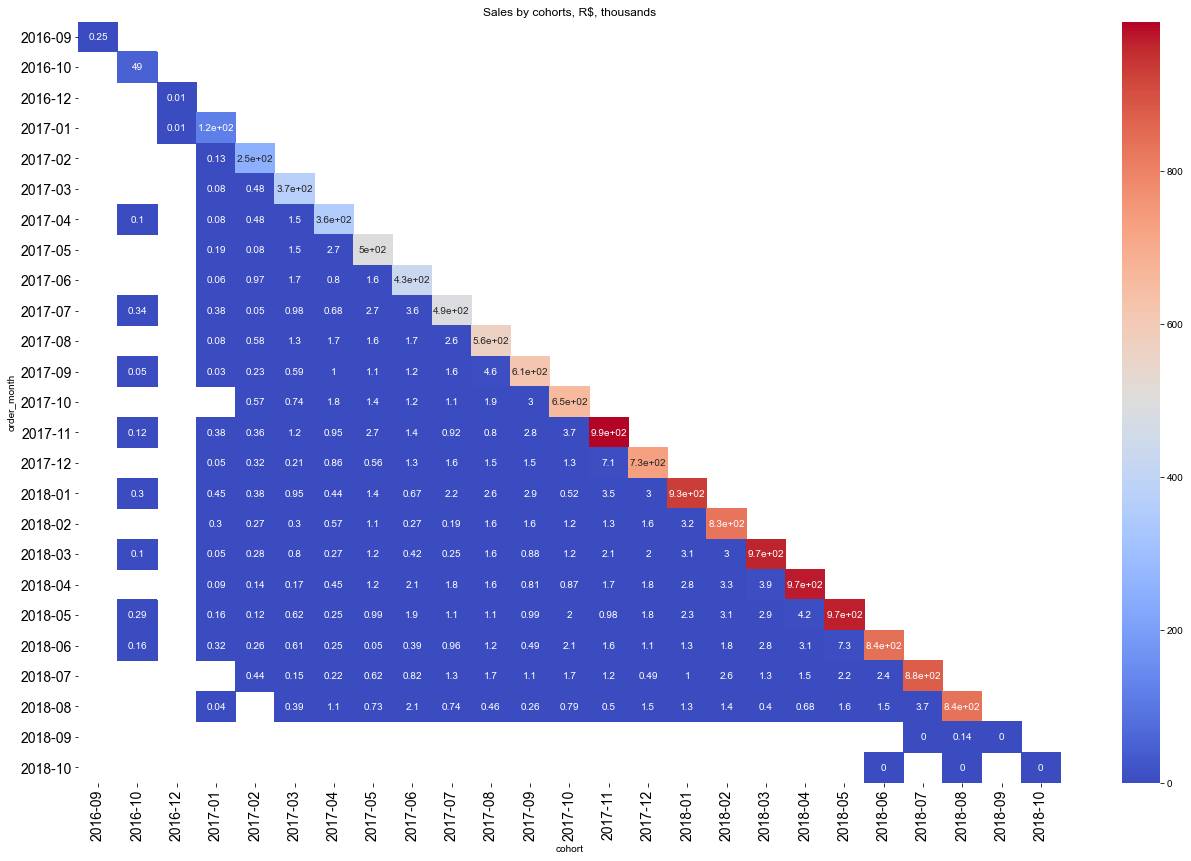

In [29]:
plt.figure(figsize=(22,14))
sns.heatmap(cohorts, annot=True, fmt='.2g', cmap= 'coolwarm')
sns.set_style('white')
plt.title ('Sales by cohorts, R$, thousands')
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14, rotation=0)
plt.show()

In [30]:
# Уже видно, что с долгоживущими когорты не назовешь, динамика продаж по когортам так себе...
# Но попробуем теперь посчитать retention
cohorts_retention = cohorts.copy()

In [31]:
cohorts_retention.head()

cohort,2016-09,2016-10,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,...,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10
order_month,,,,,,,,,,,,,,,,,,,,,
2016-09,0.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,NaN,49.48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12,NaN,NaN,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,NaN,NaN,0.01,119.82,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-02,NaN,NaN,NaN,0.13,246.68,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
cohorts_retention = cohorts_sales.groupby(['cohort', 'order_month']) \
                                 .agg({'customer_unique_id':'count'})

In [33]:
# Сделаем вспомогательную функцию для подсчета номера периода для каждой когорты
def cohort_period(df):
    df['cohort_period'] = np.arange(len(df)) + 1
    return df

cohorts_retention = cohorts_retention.groupby(level=0).apply(cohort_period)
cohorts_retention.head()

customer_unique_id  cohort_period
cohort  order_month                                   
2016-09 2016-09                       7              1
2016-10 2016-10                     379              1
        2017-04                       1              2
        2017-07                       1              3
        2017-09                       1              4

In [34]:
cohorts_retention = cohorts_retention.rename(columns = {'customer_unique_id':'customers_count'})

In [35]:
cohorts_retention.head()

customers_count  cohort_period
cohort  order_month                                
2016-09 2016-09                    7              1
2016-10 2016-10                  379              1
        2017-04                    1              2
        2017-07                    1              3
        2017-09                    1              4

In [36]:
# немного переделаем индексы дата-фрейма для последующих преобразований
cohorts_retention.reset_index(inplace=True)
cohorts_retention.set_index(['cohort', 'cohort_period'], inplace=True)

# создадим серию с общим размером когорты для того, чтобы потом посчитать ретеншен
cohort_group_size = cohorts_retention['customers_count'].groupby(level=0).first()
cohort_group_size.head()

cohort
2016-09       7
2016-10     379
2016-12       1
2017-01     965
2017-02    1995
Name: customers_count, dtype: int64

In [37]:
cohorts_retention['customers_count'].unstack(0).head()

cohort,2016-09,2016-10,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,...,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10
cohort_period,,,,,,,,,,,,,,,,,,,,,
1,7.0,379.0,1.0,965.0,1995.0,3035.0,2670.0,4143.0,3561.0,4500.0,...,8099.0,7545.0,8036.0,7757.0,7712.0,6842.0,6911.0,7087.0,5.0,1.0
2,NaN,1.0,1.0,3.0,4.0,19.0,17.0,23.0,23.0,25.0,...,30.0,30.0,37.0,44.0,47.0,30.0,49.0,9.0,NaN,NaN
3,NaN,1.0,NaN,2.0,6.0,11.0,6.0,29.0,18.0,16.0,...,38.0,39.0,28.0,31.0,25.0,22.0,2.0,2.0,NaN,NaN
4,NaN,1.0,NaN,1.0,2.0,12.0,5.0,17.0,14.0,12.0,...,28.0,25.0,23.0,22.0,18.0,1.0,NaN,NaN,NaN,NaN
5,NaN,3.0,NaN,3.0,8.0,10.0,10.0,11.0,11.0,16.0,...,22.0,28.0,10.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
# Ну а теперь, собственно и посчитаем ретеншен
user_retention = cohorts_retention['customers_count'].unstack(0).divide(cohort_group_size, axis=1)
user_retention.head()

cohort,2016-09,2016-10,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,...,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10
cohort_period,,,,,,,,,,,,,,,,,,,,,
1,1.0,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0
2,NaN,0.002639,1.0,0.003109,0.002005,0.006260,0.006367,0.005552,0.006459,0.005556,...,0.003704,0.003976,0.004604,0.005672,0.006094,0.004385,0.007090,0.001270,NaN,NaN
3,NaN,0.002639,NaN,0.002073,0.003008,0.003624,0.002247,0.007000,0.005055,0.003556,...,0.004692,0.005169,0.003484,0.003996,0.003242,0.003215,0.000289,0.000282,NaN,NaN
4,NaN,0.002639,NaN,0.001036,0.001003,0.003954,0.001873,0.004103,0.003931,0.002667,...,0.003457,0.003313,0.002862,0.002836,0.002334,0.000146,NaN,NaN,NaN,NaN
5,NaN,0.007916,NaN,0.003109,0.004010,0.003295,0.003745,0.002655,0.003089,0.003556,...,0.002716,0.003711,0.001244,0.001289,NaN,NaN,NaN,NaN,NaN,NaN


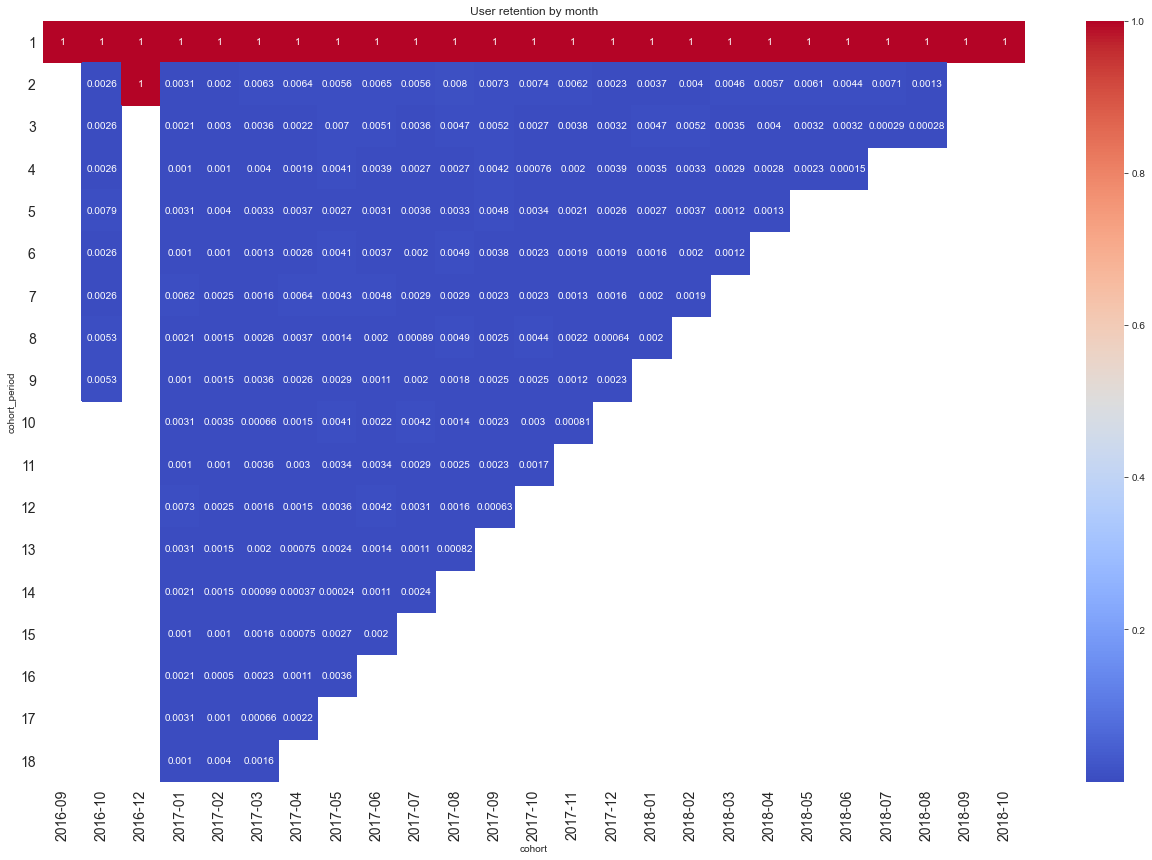

In [39]:
plt.figure(figsize=(22,14))
sns.heatmap(user_retention, annot=True, fmt='.2g', cmap= 'coolwarm')
sns.set_style('white')
plt.title ('User retention by month')
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14, rotation=0)
plt.show()

Максимальный retention на 3 месяц у нас был в когорте '2017-05'. Однако это только 0,7%
Данные говорят об очень низкой возвращаемости посетителей и проблемами с лояльностью аудитории